# SMARCB1
The SMARCB1 gene encodes a subunit of the SWI/SNF ATP-dependent chromatin-remodeling complex.
 heterozygous mutation in the SMARCB1 gene is associated with [Coffin-Siris syndrome 3](https://omim.org/entry/614608),
 [rhabdoid tumor predisposition syndrome-1](https://omim.org/entry/609322) and schwannomatosis.

In [1]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using gpsea version 0.9.6.dev0


### SMARCB1
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for SMARCB1.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service
gene_symbol = 'SMARCB1'
mane_tx_id = 'NM_003073.5'
mane_protein_id = 'NP_003064.2' # SWI/SNF-related matrix-associated actin-dependent regulator of chromatin subfamily B member 1 isoform a
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_store_release = '0.1.24' 
registry = configure_phenopacket_registry()

with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)

cohort, qc = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
print(f'Loaded {len(cohort)} individuals')
qc.summarize()

Individuals Processed: 100%|██████████| 32/32 [00:12<00:00,  2.64 individuals/s]
Loaded 32 individuals
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
17,Feeding difficulties
17,Global developmental delay
12,Short stature
12,Thick eyebrow
12,Long eyelashes
12,"Intellectual disability, severe"
12,Sparse scalp hair
12,Hypotonia
10,Atypical teratoid/rhabdoid tumor
10,Microcephaly


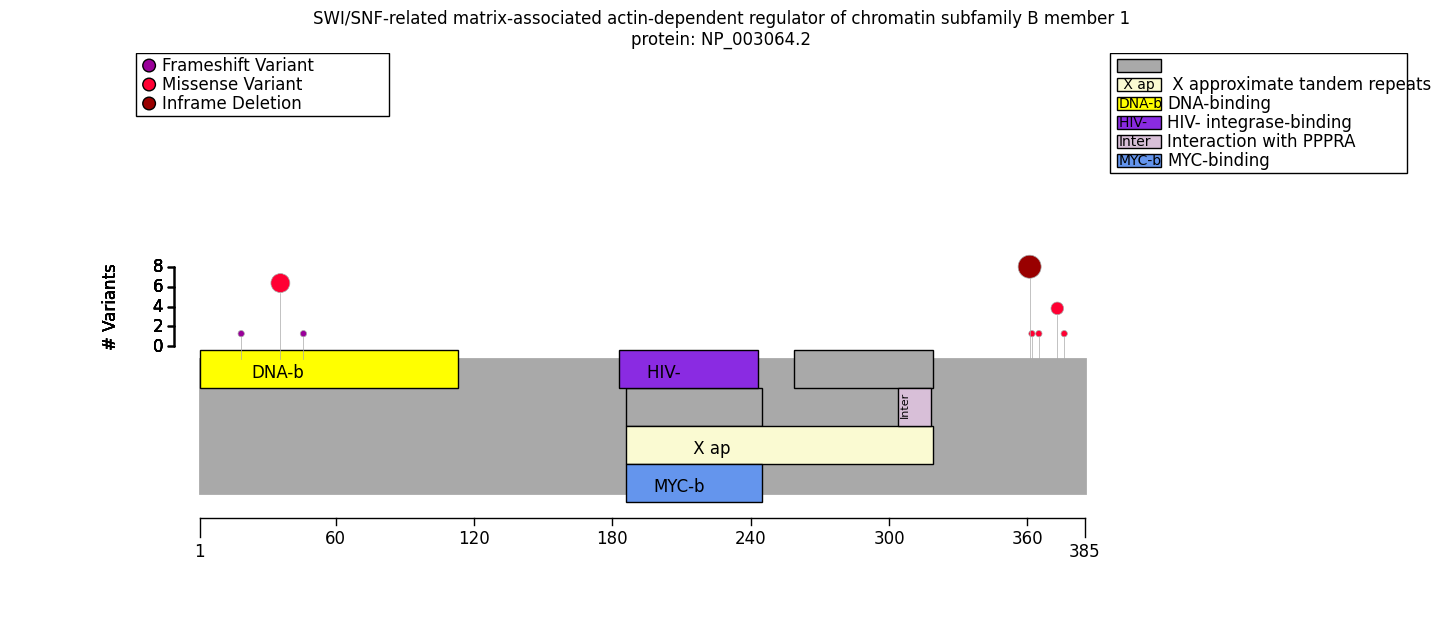

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

smarcb1_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
smarcb1_fig.tight_layout()

In [6]:
from gpsea.view import ProteinVariantViewer
viewer = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
viewer.process(cohort=cohort)

Count,Name,Type,Coordinates,Variants
7,DNA-binding,Region,2 - 113,p.Arg37His; p.Tyr47SerfsTer8; p.Asp21GlyfsTer50
0,HIV-1 integrase-binding,Region,184 - 243,
0,1,Repeat,187 - 245,
0,2 X approximate tandem repeats,Region,187 - 319,
0,MYC-binding,Region,187 - 245,
0,2,Repeat,260 - 319,
0,Interaction with PPP1R15A,Region,305 - 318,


# Genotype-Phenotype Correlation (GPC) Analysis

In [7]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
analysis = configure_hpo_term_analysis(hpo)

from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [8]:
from gpsea.analysis.predicate import variant_key
from gpsea.analysis.clf import monoallelic_classifier

k364del = variant_key(key="22_23833669_23833672_GAGA_G") #	22_23833669_23833672_GAGA_G	c.1091_1093del	p.Lys364del

k364del_predicate = monoallelic_classifier(
    a_predicate=k364del,
    b_predicate=~k364del,
    a_label="Lys364del",
    b_label="Other"
)
k364del_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=k364del_predicate,
    pheno_clfs=pheno_clfs,
)
from gpsea.view import MtcStatsViewer

viewer = MtcStatsViewer()
viewer.process(k364del_result)

Reason,Count
Skip terms if all counts are identical to counts for a child term,22
"Skipping ""general"" level terms",82
Skipping terms that are rare on the cohort level (in less than 40% of the cohort members),238


In [9]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=k364del_result)

Allele group,Lys364del,Other,Corrected p values,p values
Embryonal neoplasm [HP:0002898],0/7 (0%),10/20 (50%),0.711671,0.026055
Atypical teratoid/rhabdoid tumor [HP:0034401],0/7 (0%),10/21 (48%),0.711671,0.030171
Neoplasm by histology [HP:0011792],1/8 (12%),14/24 (58%),0.711671,0.041058
Depressed nasal bridge [HP:0005280],0/7 (0%),3/6 (50%),0.727273,0.069930
Ventricular septal defect [HP:0001629],0/7 (0%),3/6 (50%),0.727273,0.069930
Rhabdoid tumor [HP:0034557],0/7 (0%),6/16 (38%),1.000000,0.124333
"Intellectual disability, severe [HP:0010864]",7/7 (100%),5/8 (62%),1.000000,0.200000
Visual impairment [HP:0000505],3/6 (50%),7/8 (88%),1.000000,0.244755
Atrial septal defect [HP:0001631],1/7 (14%),4/10 (40%),1.000000,0.338235
Neoplasm by anatomical site [HP:0011793],1/8 (12%),5/15 (33%),1.000000,0.368976


In [10]:
from gpsea.model import VariantEffect
from gpsea.model.genome import Region
from gpsea.analysis.predicate import protein_feature

dna_binding = protein_feature(feature_id="DNA-binding", protein_metadata=protein_meta)
#(region=Region(1,164), tx_id=mane_tx_id)

dna_binding_predicate = monoallelic_classifier(
    a_predicate=dna_binding,
    b_predicate=~dna_binding,
    a_label="DNA binding",
    b_label="Other"
)
dna_binding_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=dna_binding_predicate,
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo=hpo, result=dna_binding_result)

Allele group,DNA binding,Other,Corrected p values,p values
Thick eyebrow [HP:0000574],0/1 (0%),12/12 (100%),1.0,0.076923
Long eyelashes [HP:0000527],0/1 (0%),12/12 (100%),1.0,0.076923
Sparse scalp hair [HP:0002209],0/1 (0%),12/13 (92%),1.0,0.142857
Vesicoureteral reflux [HP:0000076],2/4 (50%),1/10 (10%),1.0,0.175824
Visual impairment [HP:0000505],4/4 (100%),6/10 (60%),1.0,0.250749
Thick lower lip vermilion [HP:0000179],0/1 (0%),9/12 (75%),1.0,0.307692
Neoplasm by histology [HP:0011792],2/7 (29%),13/25 (52%),1.0,0.402500
Ptosis [HP:0000508],0/1 (0%),7/12 (58%),1.0,0.461538
"Intellectual disability, severe [HP:0010864]",4/4 (100%),8/11 (73%),1.0,0.516484
Hypotonia [HP:0001252],4/4 (100%),8/12 (67%),1.0,0.516484


In [11]:
from gpsea.analysis.predicate import variant_effect, anyof

amplifcation = variant_effect(VariantEffect.TRANSCRIPT_AMPLIFICATION, tx_id=mane_tx_id)
ablation = variant_effect(VariantEffect.TRANSCRIPT_ABLATION, tx_id=mane_tx_id)

is_struct_var = anyof((amplifcation, ablation))

sv_predicate = monoallelic_classifier(
    a_predicate=is_struct_var,
    b_predicate=~is_struct_var,
    a_label="Structural variant",
    b_label="Other"
)
sv_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sv_predicate,
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo=hpo, result=sv_result)

Allele group,Structural variant,Other,Corrected p values,p values
Neoplasm by histology [HP:0011792],11/11 (100%),4/21 (19%),0.000152,0.000011
Embryonal neoplasm [HP:0002898],8/8 (100%),2/19 (11%),0.000152,0.000020
Atypical teratoid/rhabdoid tumor [HP:0034401],8/9 (89%),2/19 (11%),0.000594,0.000119
Rhabdoid tumor [HP:0034557],4/4 (100%),2/19 (11%),0.006352,0.001694
Neuroepithelial neoplasm [HP:0030063],2/2 (100%),0/17 (0%),0.017544,0.005848
Neoplasm by anatomical site [HP:0011793],3/3 (100%),3/20 (15%),0.028233,0.011293
Neoplasm of the nervous system [HP:0004375],2/2 (100%),2/19 (11%),0.061224,0.028571
Hematological neoplasm [HP:0004377],1/1 (100%),0/17 (0%),0.092593,0.055556
Glioma [HP:0009733],1/1 (100%),0/17 (0%),0.092593,0.055556
Rhabdoid tumor of the kidney [HP:0034402],1/1 (100%),1/18 (6%),0.131579,0.105263


## Summary

Our analysis of SMARCB1 included variants associated with [Coffin-Siris syndrome 3](https://omim.org/entry/614608),
 [rhabdoid tumor predisposition syndrome-1](https://omim.org/entry/609322) and [Schwannomatosis-1, susceptibility to](https://omim.org/entry/162091). Presumably the result of embryonal neoplasm being signficantly associated with structural variants relates to a different distribution of variants in [rhabdoid tumor predisposition syndrome-1](https://omim.org/entry/609322) than in  [Coffin-Siris syndrome 3](https://omim.org/entry/614608).


In [12]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

fet_results = (
    GPAnalysisResultSummary.from_multi(
        result=k364del_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=dna_binding_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=sv_result,
    ),
)

caption = "Our analysis of SMARCB1 included variants associated with Coffin-Siris syndrome 3 (OMIM:614608), " 
"rhabdoid tumor predisposition syndrome-1 (OMIM:609322) and Schwannomatosis-1, susceptibility to (OMIM:162091). " 
"Presumably the result of embryonal neoplasm being signficantly associated with structural variants relates to a " 
"different distribution of variants in rhabdoid tumor predisposition syndrome-1 than in Coffin-Siris syndrome 3."

report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=fet_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [13]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [14]:
summarizer.process_latex(report=report, protein_fig=smarcb1_fig)

Figure saved to ../../supplement/img/SMARCB1_protein_diagram-draft.pdf
Output to ../../supplement/tex/SMARCB1_summary_draft.tex
